# Directed Null Model Generation

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import math

%matplotlib inline

In [3]:
#read in the network
G = nx.read_edgelist('largest_component_networkx_format.csv', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

## Basic Features of this Network

In [ ]:
#write some statistics to file for later use. these are statistics about the real netowrk

In [8]:
def persist_first_to_csv(centrality_dict, filename,columnname):
    curr = pd.DataFrame.from_dict(centrality_dict, orient="index", columns = [columnname])
    curr.to_csv(filename)
    
    
groupname = "RealNetwork"

clustering_filename = "{}_avg_clustering.csv".format(groupname)

apl_filename = "{}_apl.csv".format(groupname)

katz_cen_pd = "{}_katz_cen.csv".format(groupname)   
clustering_pd = "{}_clustering_df.csv".format(groupname)
degree_pd = "{}_degree_df.csv".format(groupname)

filename = "RealNetwork"
G = nx.read_edgelist("largest_component_networkx_format.csv", comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')
print(nx.average_shortest_path_length(G))
print(nx.average_clustering(G))

persist_first_to_csv(nx.clustering(G),clustering_pd,filename)
persist_first_to_csv(nx.algorithms.centrality.katz_centrality_numpy(G,weight="weight"),katz_cen_pd,filename)


0.0012293584044826328
0.009608690028807564


In [9]:
print(nx.average_shortest_path_length(G))

0.0012293584044826328


In [10]:
print(nx.average_clustering(G))

0.009608690028807564


# Plotting Katz Centrality

In [11]:
#get degree as a dictionary
deg_dict = dict(G.degree)

In [13]:
#turn it into a dataframe
degrees = pd.DataFrame.from_dict(deg_dict, orient="index", columns = ["degree"])

In [16]:
#read in the katz centrality of the real netork
real_katz = pd.read_csv('RealNetwork_katz_cen.csv')

In [18]:
real_katz = real_katz.set_index("Unnamed: 0")

In [19]:
#make it into a data frame with degrees
real_katz_degs = pd.merge(real_katz, degrees, left_index=True, right_index=True)

In [20]:
real_katz_degs


,RealNetwork,degree
1385933370090209280,0.003869,1
158095776,0.013542,18
1416535505454338050,0.003869,2
1604931252,0.019733,39
544695802,0.003869,1
...,...,...
77596220,0.003869,1
891058415195303939,0.003869,1
1095768409449459712,0.003869,1
881426857,0.003869,1


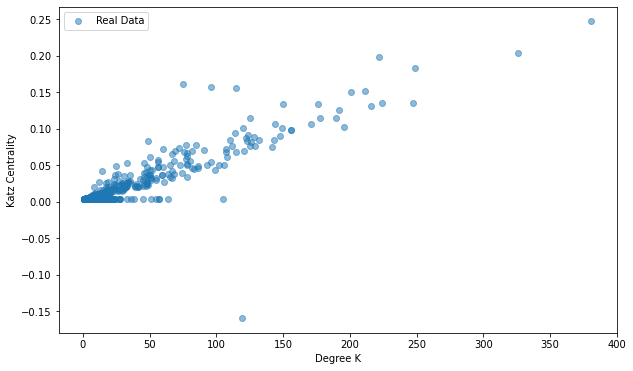

In [22]:
#plot the katz centrality vs degree
fig, ax = plt.subplots(figsize=(10, 6))

#ax.scatter(x = betweenness ['degree'], y = betweenness ['average'],  label = "Random", alpha = 0.5)
ax.scatter(x = real_katz_degs['degree'], y = real_katz_degs['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Katz Centrality")
plt.legend(loc="upper left")

https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib

https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/

In [23]:
#read in all the files from the null models
all_katz_files = ['Group2_katz_cen.csv', 'Group4_katz_cen.csv','Group1_katz_cen.csv', 'Group3_katz_cen.csv','Group5_katz_cen.csv']
all_katz_dfs = []
for file in all_katz_files:
    all_katz_dfs.append(pd.read_csv(file))

for df in all_katz_dfs:
    df = df.set_index("Unnamed: 0")
    real_katz = pd.merge(real_katz_degs, df, left_index=True, right_index=True)

In [24]:
real_katz


,RealNetwork,degree,Directed_Weighted_Random_Null_Model_800,Directed_Weighted_Random_Null_Model_801,Directed_Weighted_Random_Null_Model_802,Directed_Weighted_Random_Null_Model_803,Directed_Weighted_Random_Null_Model_804,Directed_Weighted_Random_Null_Model_805,Directed_Weighted_Random_Null_Model_806,Directed_Weighted_Random_Null_Model_807,...,Directed_Weighted_Random_Null_Model_990,Directed_Weighted_Random_Null_Model_991,Directed_Weighted_Random_Null_Model_992,Directed_Weighted_Random_Null_Model_993,Directed_Weighted_Random_Null_Model_994,Directed_Weighted_Random_Null_Model_995,Directed_Weighted_Random_Null_Model_996,Directed_Weighted_Random_Null_Model_997,Directed_Weighted_Random_Null_Model_998,Directed_Weighted_Random_Null_Model_999
1385933370090209280,0.003869,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
158095776,0.013542,18,0.015653,0.015628,0.015577,0.015789,0.015672,0.015764,0.027191,0.015748,...,0.015735,0.015643,0.015654,0.015798,0.030790,0.015710,0.039046,0.017081,0.015571,0.015744
1416535505454338050,0.003869,2,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
1604931252,0.019733,39,0.027952,0.027349,0.027260,0.032995,0.027427,0.027587,0.027217,0.027559,...,0.027535,0.027376,0.027394,0.027647,0.040676,0.027492,0.042667,0.027441,0.029974,0.027551
544695802,0.003869,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77596220,0.003869,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
891058415195303939,0.003869,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
1095768409449459712,0.003869,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
881426857,0.003869,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623


In [25]:
#drop the real network katz to get all the data for the random ones with degrees
random_katz = real_katz.drop('RealNetwork',axis = 1)

In [26]:
random_katz


,degree,Directed_Weighted_Random_Null_Model_800,Directed_Weighted_Random_Null_Model_801,Directed_Weighted_Random_Null_Model_802,Directed_Weighted_Random_Null_Model_803,Directed_Weighted_Random_Null_Model_804,Directed_Weighted_Random_Null_Model_805,Directed_Weighted_Random_Null_Model_806,Directed_Weighted_Random_Null_Model_807,Directed_Weighted_Random_Null_Model_808,...,Directed_Weighted_Random_Null_Model_990,Directed_Weighted_Random_Null_Model_991,Directed_Weighted_Random_Null_Model_992,Directed_Weighted_Random_Null_Model_993,Directed_Weighted_Random_Null_Model_994,Directed_Weighted_Random_Null_Model_995,Directed_Weighted_Random_Null_Model_996,Directed_Weighted_Random_Null_Model_997,Directed_Weighted_Random_Null_Model_998,Directed_Weighted_Random_Null_Model_999
1385933370090209280,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,0.005616,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
158095776,18,0.015653,0.015628,0.015577,0.015789,0.015672,0.015764,0.027191,0.015748,0.015725,...,0.015735,0.015643,0.015654,0.015798,0.030790,0.015710,0.039046,0.017081,0.015571,0.015744
1416535505454338050,2,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,0.005616,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
1604931252,39,0.027952,0.027349,0.027260,0.032995,0.027427,0.027587,0.027217,0.027559,0.039768,...,0.027535,0.027376,0.027394,0.027647,0.040676,0.027492,0.042667,0.027441,0.029974,0.027551
544695802,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,0.005616,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77596220,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,0.005616,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
891058415195303939,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,0.005616,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
1095768409449459712,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,0.005616,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623
881426857,1,0.005590,0.005581,0.005563,0.005639,0.005597,0.005630,0.005554,0.005624,0.005616,...,0.005619,0.005587,0.005591,0.005642,0.005629,0.005611,0.005599,0.005600,0.005561,0.005623


In [27]:
#get the average
random_katz['average_node_katz'] = random_katz.mean(axis=1)

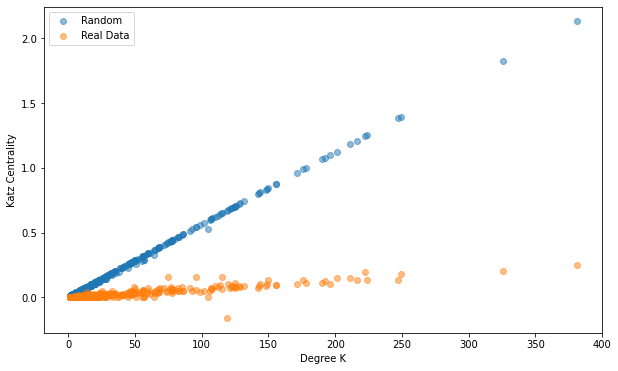

In [28]:
#plot the real katz vs the random katz
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = random_katz['degree'], y = random_katz ['average_node_katz'],  label = "Random", alpha = 0.5)
ax.scatter(x = real_katz['degree'], y = real_katz['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Katz Centrality")
plt.legend(loc="upper left")

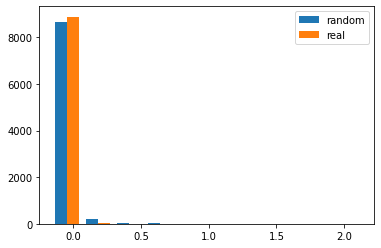

In [29]:
#plot it in a histogram
plt.hist([random_katz['average_node_katz'], real_katz['RealNetwork']],label=['random', 'real'])
plt.legend(loc='upper right')
plt.show()

In [49]:
#get the mean and variance of the clusetering for the null models
import numpy
all_files = ['Group1_avg_clustering.csv', 'Group2_avg_clustering.csv','Group3_avg_clustering.csv','Group4_avg_clustering.csv','Group5_avg_clustering.csv']
clustering_vals = []
for file in all_files:
    f = open(file, "r")
    clustering_vals.extend(f.readlines())

for i in range(len(clustering_vals)):
    clustering_vals[i] = float(clustering_vals[i])
    
arr = numpy.array(clustering_vals)

print("Mean: {}".format(arr.mean()))
print("Variance: {}".format(arr.std()))


Mean: 0.0015129234929798898
Variance: 0.0002377723358388393


In [50]:
#get the mean and variance of the apl for the null models
import numpy
all_files = ['Group1_apl.csv', 'Group2_apl.csv','Group3_apl.csv','Group4_apl.csv','Group5_apl.csv']
clustering_vals = []
for file in all_files:
    f = open(file, "r")
    clustering_vals.extend(f.readlines())

for i in range(len(clustering_vals)):
    clustering_vals[i] = float(clustering_vals[i])
    
arr = numpy.array(clustering_vals)

print("Mean: {}".format(arr.mean()))
print("Variance: {}".format(arr.std()))

Mean: 0.00231376540189219
Variance: 0.0013284904604647586
